<a href="https://colab.research.google.com/github/Kinbloom/Malaria-Detection-Convolutional-Neural-Network/blob/master/Malaria_Detection_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using  Convolutional Neural Networks to Detect Malaria-Infected Cells

## Defining the Context

According to the World Health Organization, nearly half of the world's population risks contacting Malaria.

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected mosquitoes. 

Automation of the diagnosis process will enable accurate diagnosis of the disease and hence holds the promise of delivering reliable health-care to resource-scarce areas. 

Machine learning technologies have been used for automated diagnosis of Malaria, in this case we make use of a Convolutional Neural Network.


###Problem Statement

In most cases often the only available method for diagnosing Malaria is a manual examination of the microscopic slides. This process (manual examination) is tedious, slow and requires expertise which is limited, especially in rural areas.

###Objectives

What we aim to do is build a Convolutional Neural Network (CNN) that helps automate the process of diagnosis of Malaria by classifying whether a cell is parasitized or uninfected.

We have 13,780 image cells infected with Malaria and 13,780 normal cells in our image directories.

###Metrics of Success

A Neural Network that predicts with an accuracy greater than 85%

###Steps taken 

1. Import the necessary libraries
2. Load the images from the data source
3. Display random samples of the cells
4. Define the layers of the CNN
5. Split the data into train and test sets
6. Fitting the model with the training data
7. Check for accuracy of the training ,validation and test sets
8. Augment the model to try improve the accuracy 

### Importing Required Libraries

In [0]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import the necessary sklearn commands
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
#Import the necessary keras libraries

import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, \
Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import cv2
import glob
from PIL import Image

Using TensorFlow backend.


###Load the image data from the data source

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq '/content/drive/My Drive/malaria.zip'

In [0]:
data_path = '/content/cell_images'

#Set each image size to be 64x64.
size = 64
dataset = []
label = []



In [0]:
# loading images for infected cells
infected_images = os.listdir('/content/cell_images/Parasitized')
for i, image_name in enumerate(infected_images):
    try:
        if (image_name.split('.')[1] == 'png'): #Iterate through all files with extension 'png'.
          
            image = cv2.imread(data_path + '/Parasitized/' + image_name)  # loading images from the parasitized file
            image = Image.fromarray(image, 'RGB')
            image = image.resize((size, size))   # creating resized copies of the images
            dataset.append(np.array(image))   # appending the images to our dataset list 
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

*Steps taken to load the Infected Cell files*
- Read the image using cv2.imread()
- Convert it from an array using Image.fromarray() and resize it to 64x64 (which was the size specified for each image). 
- Save it to the dataset variable and append 0 for each of these images to label. 

In [0]:
# loading images for uninfected cells
uninfected_images = os.listdir('/content/cell_images/Uninfected')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(data_path + '/Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((size, size))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

*Steps taken to load the Uninfected Cell files*
- Read the image using cv2.imread()
- Convert it from an array using Image.fromarray() and resize it to 64x64 (which was the size specified for each image). 
- Save it to the dataset variable and append 1 for each of these images to label. 

###Visualize the Cell Data

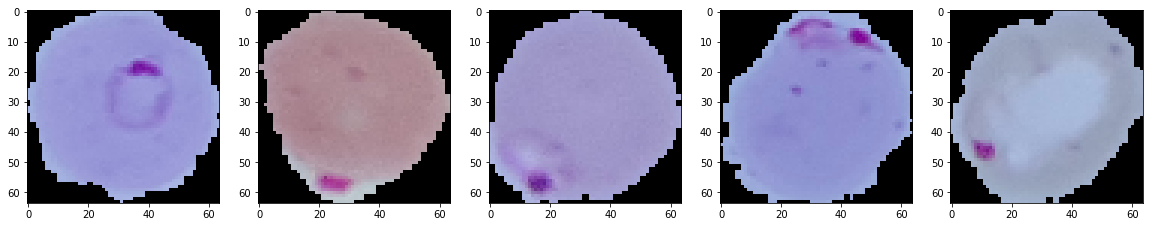

In [0]:
#Plot the images for infected cells
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(infected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])
    

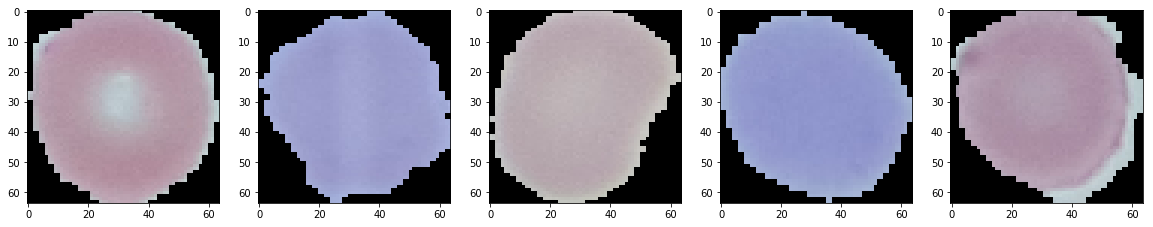

In [0]:
#Plot the images for uninfected cells
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(uninfected_images) + image_index])
    

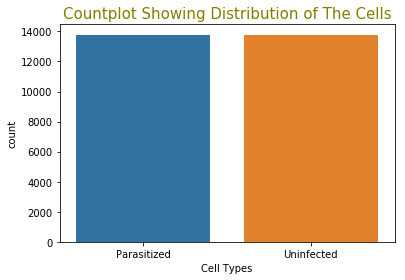

In [0]:
import seaborn as sns



sns.countplot(label)
plt.title('Countplot Showing Distribution of The Cells', fontsize=15, color='olive')
plt.xlabel('Cell Types')
plt.xticks([0,1], ['Parasitized', 'Uninfected'])
plt.show()

###The Convolutional Neural Network

In [0]:
#Defining the layers for the neural network
#Convolutional Neural Network

classifier = None

#The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
classifier = Sequential()

#We use the ‘add()’ function to add layers to our model.
#Our first layer is a Convolution2D layer. This is a convolution layer that will deal with our input images, which are seen as 2-dimensional matrices.
#In our case, 32 in the first layer is the number of nodes in each layer. 
#This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 32 works well, so we will stick with this for now.
# Size (kernel size) is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix
#The activation function we will be using  is the ReLU, or Rectified Linear Activation. 
#Our first layer also takes in an input shape. This is the shape of each input image.
classifier.add(Convolution2D(32, (3, 3), input_shape = (size, size, 3), activation = 'relu'))

#Downscaling outputs using maxpool2D
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

#Normalizing output from previous activation function
#The axis to be normalized is defined as -1
classifier.add(BatchNormalization(axis = -1))

#Setting select random values to 0 to prevent overfitting
classifier.add(Dropout(0.2))

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

classifier.add(BatchNormalization(axis = -1))

classifier.add(Dropout(0.2))

#Transforming the matrix to a single array
classifier.add(Flatten())

#The units define the number of neurons in the given layer
classifier.add(Dense(activation = 'relu', units=512))

classifier.add(BatchNormalization(axis = -1))

classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'relu', units=256))

classifier.add(BatchNormalization(axis = -1))

classifier.add(Dropout(0.2))


# 2 units for the output layer because the cell is either infected or not
classifier.add(Dense(activation = 'sigmoid', units=2))















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


*Steps to be taken in creating the CNN*

- Create a Convolution kernel 
- Followed by a MaxPooling layer
- Followed by BatchNormalization to normalize the output from the previous layers 
- Apply the Dropout regularization. 
- Append set of these layers
- Flatten the outputs ; The flattened outputs are then passed to an Artificial Neural Network which includes three dense layers with 512, 256 and 2 nodes. 
- The last layer is the output layer with the activation function sigmoid

In [0]:
#Compilation 
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)     

In [0]:
#Split data into training and test sets
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 10)

In [0]:
#Fit the model with training data

history = classifier.fit(np.array(X_train), y_train, \
                         batch_size = 64, verbose = 2, epochs = 50,\
                         validation_split = 0.1, shuffle = False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19841 samples, validate on 2205 samples
Epoch 1/50
 - 13s - loss: 0.4775 - acc: 0.7697 - val_loss: 2.6556 - val_acc: 0.5664
Epoch 2/50
 - 8s - loss: 0.2352 - acc: 0.9122 - val_loss: 0.4043 - val_acc: 0.8449
Epoch 3/50
 - 8s - loss: 0.1950 - acc: 0.9272 - val_loss: 0.2856 - val_acc: 0.8816
Epoch 4/50
 - 8s - loss: 0.1753 - acc: 0.9341 - val_loss: 0.1818 - val_acc: 0.9215
Epoch 5/50
 - 8s - loss: 0.1565 - acc: 0.9395 - val_loss: 0.1920 - val_acc: 0.9261
Epoch 6/50
 - 8s - loss: 0.1359 - acc: 0.9483 - val_loss: 0.7213 - val_acc: 0.7379
Epoch 7/50
 - 8s - loss: 0.1245 - acc: 0.9515 - val_loss: 0.2185 - val_acc: 0.9274
Epoch 8/50
 - 8s - loss: 0.1045 - acc: 0.9598 - val_loss: 0.3161 - val_acc: 0.9029
Epoch 9/50
 - 8s - loss: 0.0916 - acc: 0.9616 - val_loss: 0.3107 - val_acc: 0.8998
Epoch 10/50
 - 9s - loss: 0.0803 - acc: 0.9668 - val_loss: 0.2688 - val_acc: 0.9302
Epoch 11/50
 - 8s - los

In [0]:
#Print the test set accuracy
print('Test Accuracy: {:.2f}%'.format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]* 100))

5512/5512 [==============================] - 1s 171us/step
Test Accuracy: 95.25%


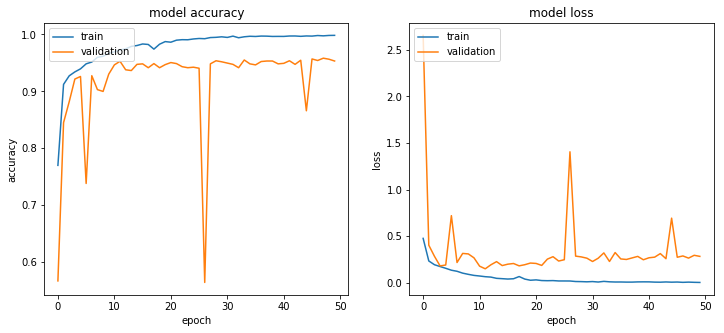

In [0]:
#Plot the model accuracy vs the model loss
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])

ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train','validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train','validation'], loc='upper left')
plt.show()

### Using Augmentation to Improve Model Accuracy

In [0]:
#Use augmentation to improve the accuracy of the model
#Data augmentation is used to expand the training dataset to improve the model's performance and ability to generalize

from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.3,\
                                     horizontal_flip = True, rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test), y_test, batch_size = 64,
                                     shuffle = False)

In [0]:
# validation_generator = test_datagen.flow_from_directory(test_data_path,
#                                                         target_size=(img_rows, img_cols),
#                                                         batch_size=batch_size,
#                                                         class_mode='categorical')

#Fit the model on the augmented training data
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)//64,
                                   epochs = 50, shuffle = False)

Epoch 1/50
345/344 [==============================] - 33s 95ms/step - loss: 0.2462 - acc: 0.9224
Epoch 2/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1860 - acc: 0.9363
Epoch 3/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1718 - acc: 0.9409
Epoch 4/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1708 - acc: 0.9395
Epoch 5/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1653 - acc: 0.9441
Epoch 6/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1617 - acc: 0.9434
Epoch 7/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1571 - acc: 0.9457
Epoch 8/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1565 - acc: 0.9458
Epoch 9/50
345/344 [==============================] - 33s 96ms/step - loss: 0.1524 - acc: 0.9486
Epoch 10/50
345/344 [==============================] - 33s 95ms/step - loss: 0.1545 - acc: 0.9475
Epoch 11/50
345/344 [========

In [0]:
#Evaluate the new accuracy after augmentation
print('Test Accuracy after augmentation: {:.2f}%' .format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose=1)[1]*100))

5512/5512 [==============================] - 47s 8ms/step
Test Accuracy after augmentation: 96.08%


Training set accuracy in the last epoch was 95.91%, which differs only slightly to the test set accuracy after augmentation. 

The slight difference in the two accuracies implies the model does not suffer from overfitting

## Conclusion

The high accuracy exhibited by CNNs suggests they can serve as appropriate neural networks for detecting and diagnosing whether a cell is malaria-infected or not

Using deep learning models like CNNs to detect and diagnose malaria could prove to be very effective, cheap, and scalable. 